<a href="https://colab.research.google.com/github/naveenkumar1805/capstone-project-2-supervised-machine-learning-_retail_Sales_prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [285]:
rossmann_store_data=pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv')

In [286]:
store_df= pd.read_csv("/content/drive/MyDrive/capstone_project 2-supervised_ml/Copy of store.csv")

In [287]:
rossmann_store_data.shape, store_df.shape

((1017209, 9), (1115, 10))

In [288]:
rossmann_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [289]:
rossmann_store_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [290]:
rossmann_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [291]:
rossmann_store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [292]:
rossmann_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [293]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [294]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [295]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [296]:
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


## **DATA CLEANING**

In [297]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [298]:
store_df= store_df.fillna(0)


In [299]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [300]:
df=pd.merge(rossmann_store_data,store_df,how='inner', on='Store')

In [301]:
df.shape

(1017209, 18)

In [302]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [303]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [305]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18,5415.98,4.93,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38,7710.25,4.28,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,700.00,0.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,2320.00,4.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,6880.00,9.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [306]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [307]:
# converting date coulmn into year , month and date
df['Date'] = pd.to_datetime(df['Date'])
df['Promo2SinceYear']= pd.to_datetime(df['Promo2SinceYear'])

df['year_of_sales'] =  df['Date'].dt.year 
df['month_of_sales'] =  df['Date'].dt.month.astype(int)
df['day_of_sales'] =  df['Date'].dt.day.astype(int)
df['Promo2SinceYear'] =  df['Promo2SinceYear'].dt.year.astype(int)



In [308]:
df.drop('Date',inplace=True,axis=1)

In [309]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year_of_sales,month_of_sales,day_of_sales
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,2015,7,31
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,2015,7,30
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,2015,7,29
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,2015,7,28
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,2015,7,27


## **EXPLORATORY DATA ANALYSIS**

In [310]:
df.shape

(1017209, 20)

In [311]:
df['year_of_sales'].value_counts().reset_index()

,index,year_of_sales
0,2013,406974
1,2014,373855
2,2015,236380


In [312]:
year_of_sales_df=df.groupby(['year_of_sales'])['Sales'].sum().reset_index().rename(columns={'year_of_sales': 'Year'})

In [313]:
year_of_sales_df

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


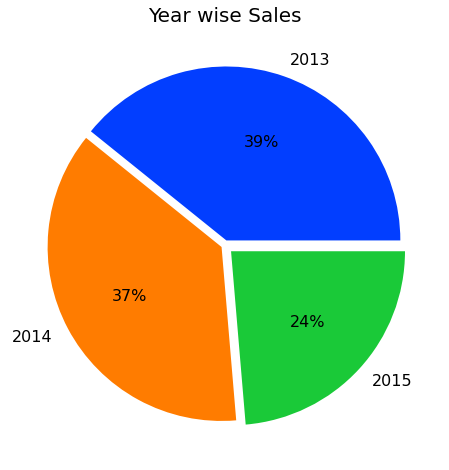

In [314]:
plt.figure(figsize=(10,8))                                        #setting fig size
plt.title('Year wise Sales',size = 20)                              # giving title name
explode = [0.03,0.02,0.05,]                             
colors = sns.color_palette('bright')                               # Seaborn color palette to plot pie chart
plt.pie(year_of_sales_df.Sales, labels=year_of_sales_df.Year, colors=colors,autopct='%.0f%%',explode = explode);

In [315]:
month_of_sales_df=df.groupby(['year_of_sales','month_of_sales'])['Sales'].sum().reset_index()
month_of_sales_df

,year_of_sales,month_of_sales,Sales
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369
3,2013,4,183431432
4,2013,5,185411063
5,2013,6,180702351
6,2013,7,208843882
7,2013,8,198042727
8,2013,9,178053963
9,2013,10,187662330


Text(0.5, 1.0, 'Distribution of sales by month in year ')

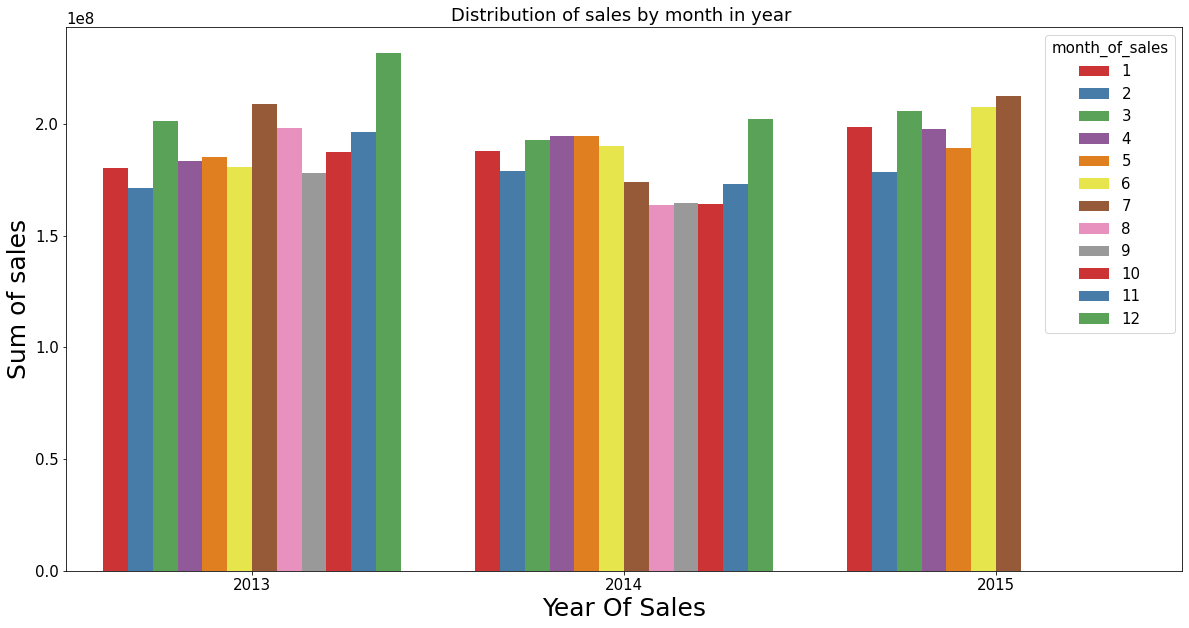

In [316]:

plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '15'
sns.barplot(x="year_of_sales",
           y="Sales",
           hue="month_of_sales",
           data=month_of_sales_df,palette='Set1')
plt.xlabel('Year Of Sales', size=25)
plt.ylabel('Sum of sales', size=25)
plt.title('Distribution of sales by month in year ')

In [317]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

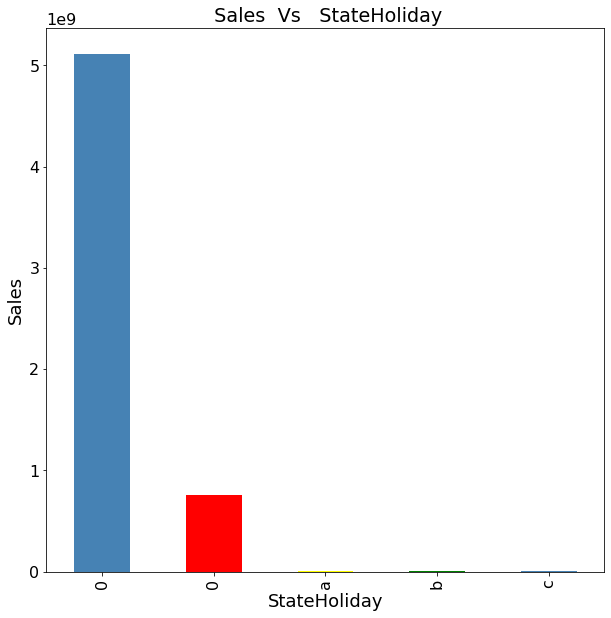

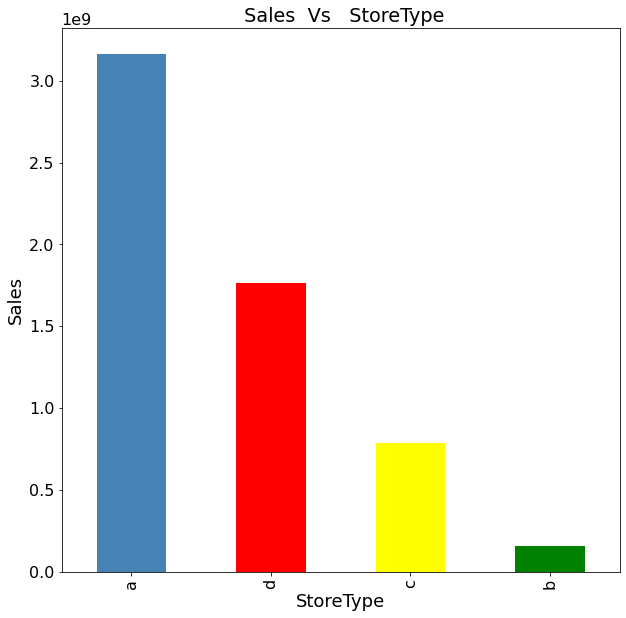

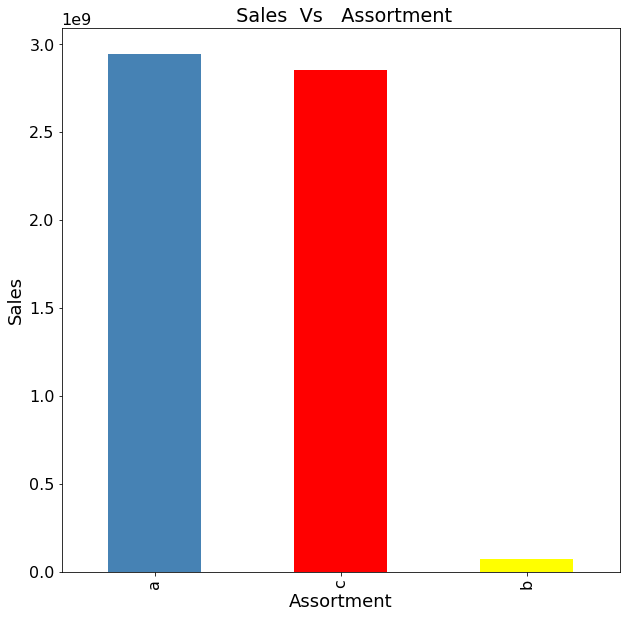

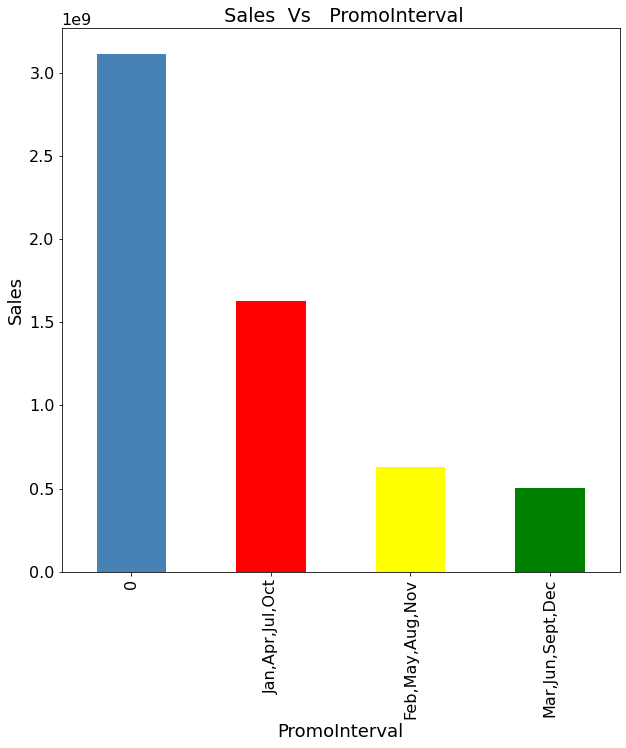

In [318]:
for col in categorical_features:
    counts = df.groupby([col])['Sales'].sum().sort_values(ascending = False)
    fig = plt.figure(figsize=(10, 10))
    plt.rcParams['font.size'] = '16'

    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['steelblue','red','yellow','green'])
    ax.set_title( ' Sales  Vs   '   +   col )
    ax.set_xlabel(col,fontsize=18) 
    ax.set_ylabel("Sales",fontsize=18)

In [319]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year_of_sales', 'month_of_sales',
       'day_of_sales'],
      dtype='object')

In [320]:
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].astype(int)
df['CompetitionOpenSinceMonth']=df['CompetitionOpenSinceMonth'].astype(int)
df['Promo2SinceWeek']=df['Promo2SinceWeek'].astype(int)


In [321]:
new_col=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek']

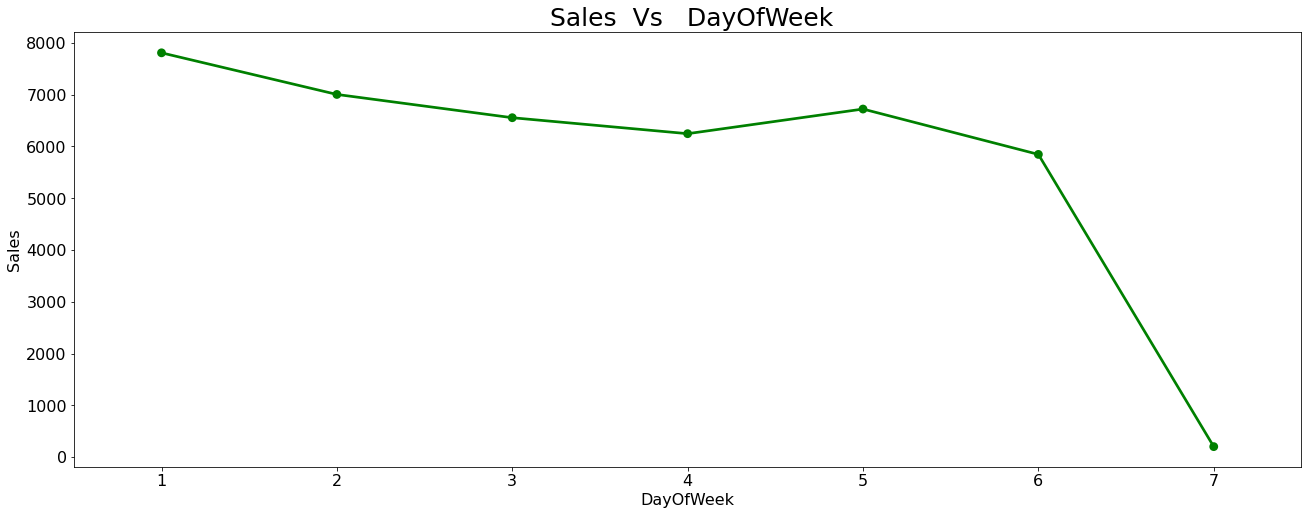

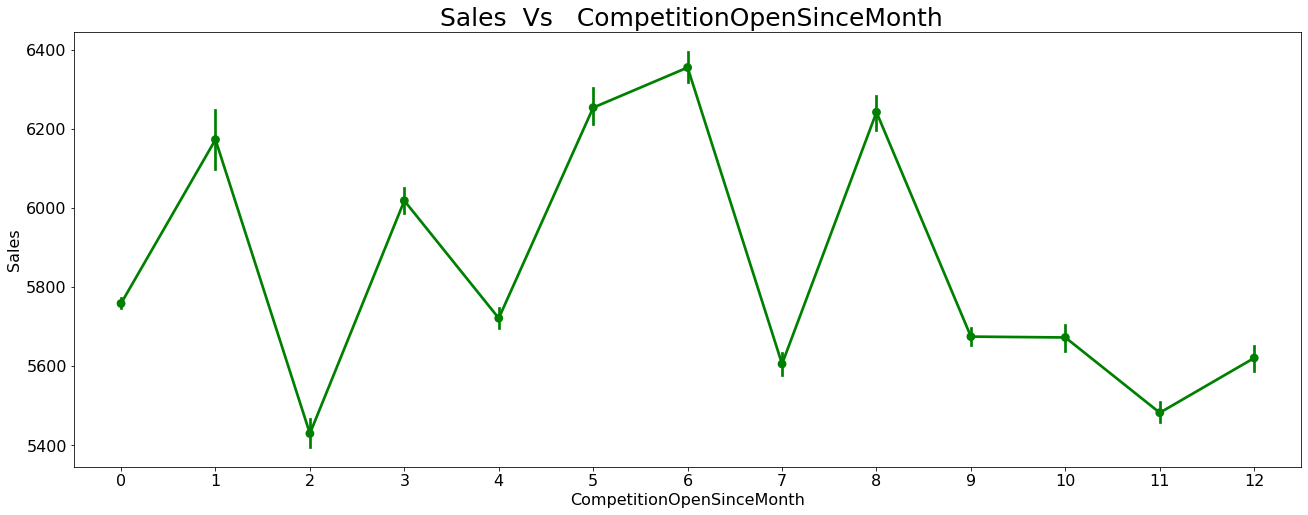

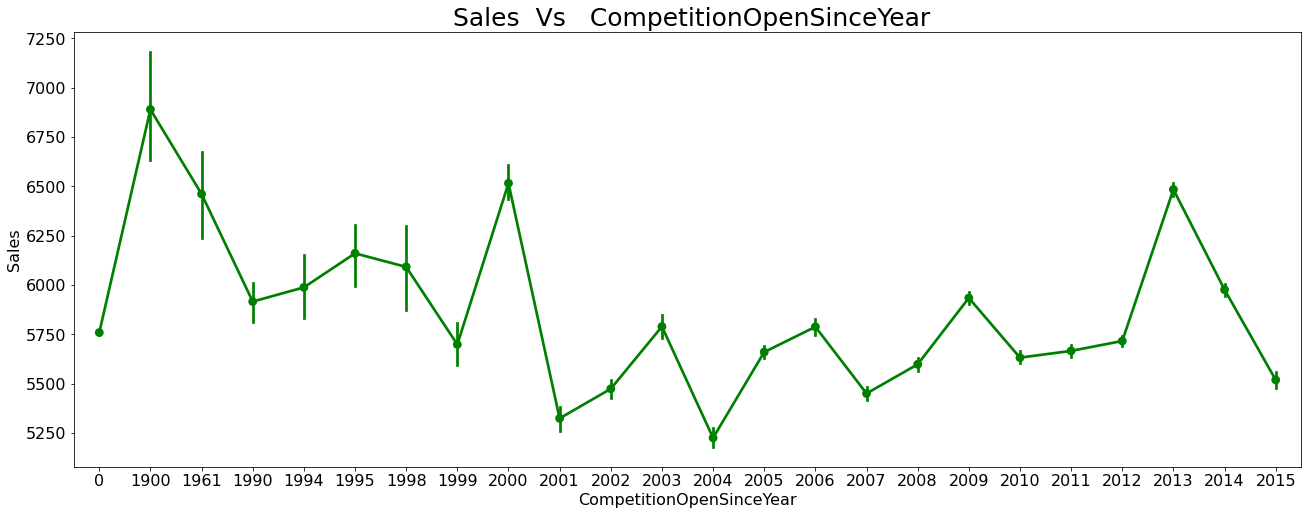

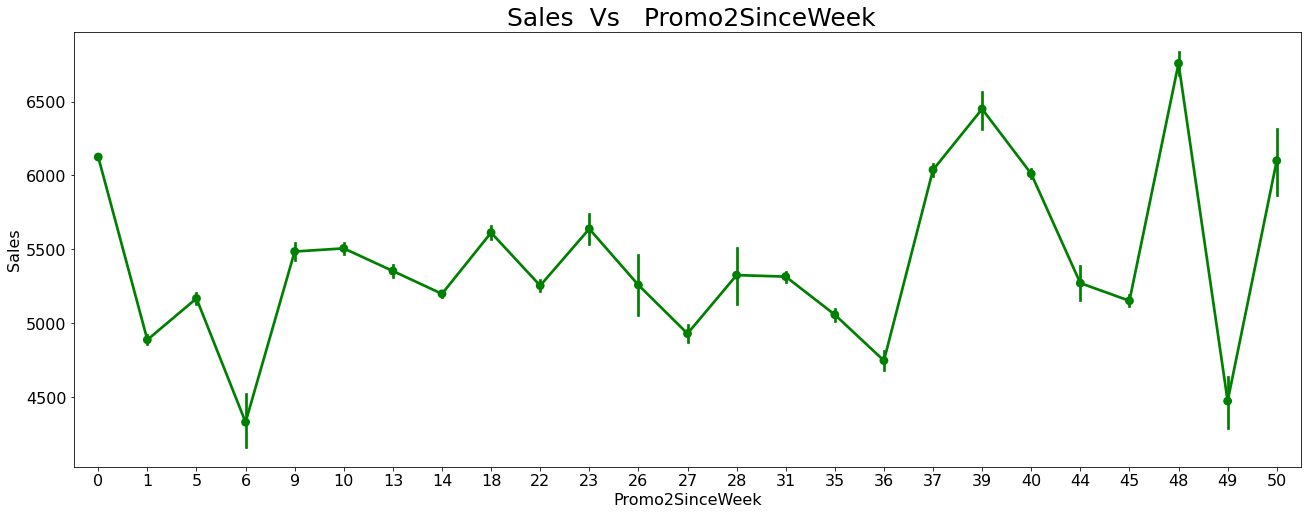

In [322]:
for i in new_col:
   plt.figure(figsize = (22,8))
   plt.rcParams['font.size'] = '16'
   sns.pointplot(x=i,y = df['Sales'],data = df,color='g')
   plt.title(' Sales  Vs   '   +   i, size=25)

In [323]:
store_count=df.groupby('StoreType')['StoreType'].count()
sales_per_store = df.groupby('StoreType')['Sales'].sum()
customers_per_store = df.groupby('StoreType')['Customers'].sum()
avg_sales_per_store = df.groupby('StoreType')['Sales'].mean()

Text(0.5, 1.0, 'Average Sales per Store Type')

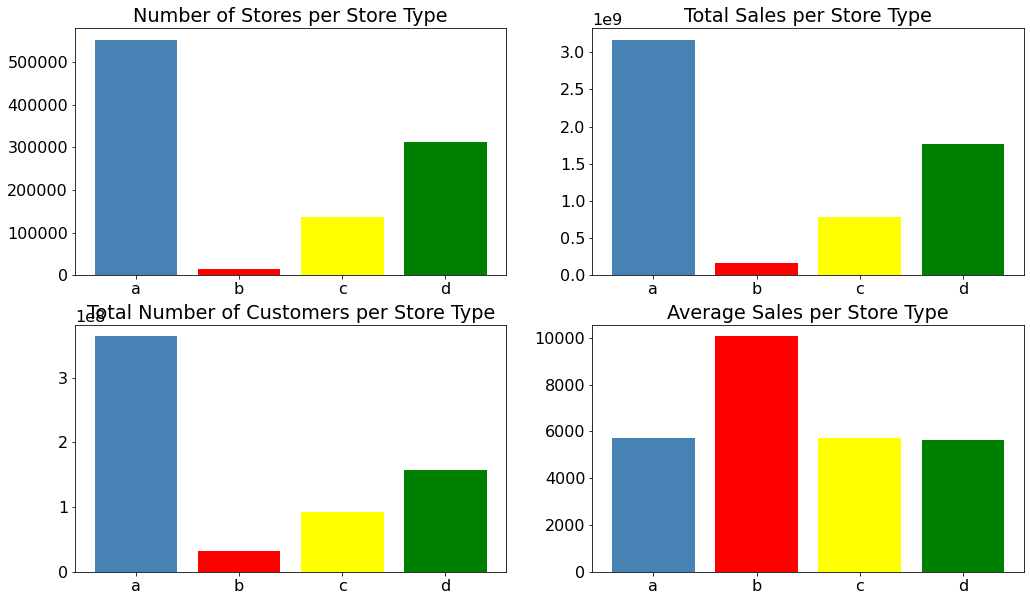

In [324]:
figure, axis = plt.subplots(2, 2,figsize=(17,10))
  
# For Number of Stores per Store Type
axis[0, 0].bar(store_count.index,store_count ,color=['steelblue','red','yellow','green'])
axis[0, 0].set_title("Number of Stores per Store Type")
  
# For Total Sales per Store Type
axis[0, 1].bar(sales_per_store.index,sales_per_store ,color=['steelblue','red','yellow','green'])
axis[0, 1].set_title("Total Sales per Store Type")

#Total Number of Customers per Store Type (in Millions
axis[1, 0].bar(customers_per_store.index,customers_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 0].set_title("Total Number of Customers per Store Type")

# for Average Sales per Store Type
axis[1, 1].bar(avg_sales_per_store.index,avg_sales_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 1].set_title("Average Sales per Store Type")



Plot between Dayof Week and Open & promo.

Text(0, 0.5, 'Store open/close Count')

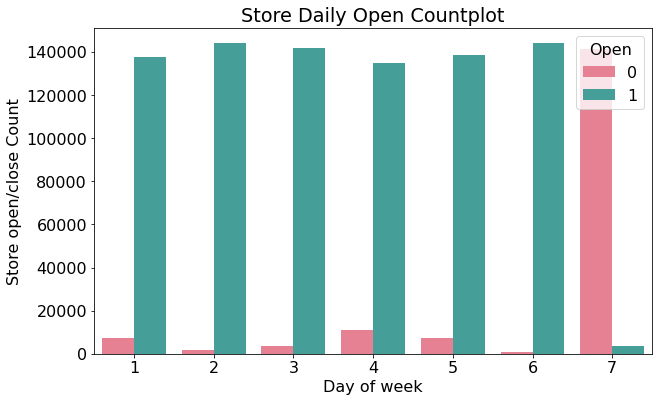

In [325]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'DayOfWeek', hue='Open', data= df, palette="husl")
plt.title('Store Daily Open Countplot')
plt.xlabel('Day of week')
plt.ylabel('Store open/close Count')

Text(0, 0.5, 'Promo count')

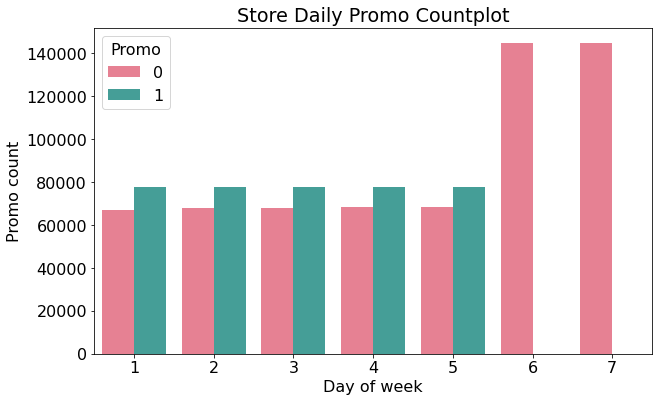

In [326]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= df, palette='husl')
plt.title('Store Daily Promo Countplot')

plt.xlabel('Day of week')
plt.ylabel('Promo count')

In [327]:
#df['Promo2SinceYear'].unique()

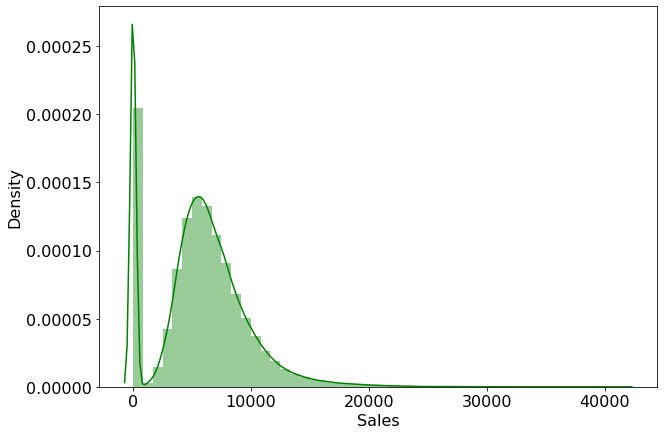

In [328]:
# Dependent variable 'Sales'
plt.figure(figsize=(10,7))
plt.rcParams['font.size'] = '16'
sns.distplot(df['Sales'],color="g")

In [329]:
#removing zeros
df=df[df['Sales']>0]

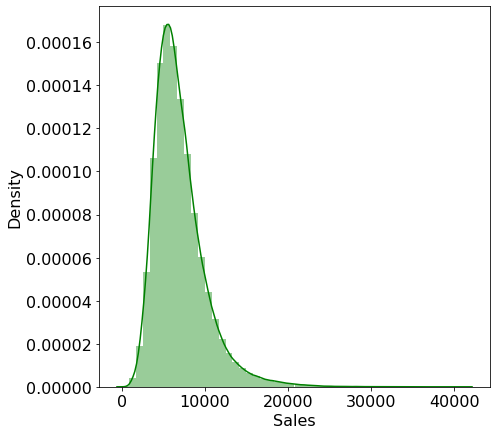

In [330]:
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="g");

# ***REMOVING OUTLIER ***

In [331]:
fix_col=['Sales','Customers','CompetitionDistance']

In [332]:
#Defining percentile range and calulating IQR
Q1 = df[fix_col].quantile(0.25)    #25% percentile
Q3 = df[fix_col].quantile(0.75)    #75% percentile
IQR = Q3 - Q1     #IQR (Inter Quartile Range)
print(IQR)

Sales                  3501.0
Customers               374.0
CompetitionDistance    6180.0
dtype: float64


In [333]:
df = df[~((df[fix_col] < (Q1 - 1.5 * IQR)) |(df[fix_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [334]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year_of_sales,month_of_sales,day_of_sales
count,713769.000000,713769.000000,713769.000000,713769.000000,713769.0,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.0,713769.000000,713769.000000,713769.000000
mean,557.160090,3.538431,6469.041340,696.045994,1.0,0.436695,0.192645,3515.150546,4.965643,1368.084237,0.533482,12.365159,1970.0,2013.832849,5.808573,15.861881
std,324.335318,1.708969,2311.230438,250.716405,0.0,0.495977,0.394377,3783.111008,4.315738,936.159654,0.498878,15.515798,0.0,0.778436,3.308818,8.645713
min,1.000000,1.000000,133.000000,18.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,1.000000,1.000000
25%,277.000000,2.000000,4764.000000,511.000000,1.0,0.000000,0.000000,650.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,3.000000,8.000000
50%,555.000000,4.000000,6174.000000,657.000000,1.0,0.000000,0.000000,2100.000000,4.000000,2006.000000,1.000000,1.000000,1970.0,2014.000000,6.000000,16.000000
75%,844.000000,5.000000,7912.000000,850.000000,1.0,1.000000,0.000000,5000.000000,9.000000,2011.000000,1.000000,22.000000,1970.0,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,13611.000000,1454.000000,1.0,1.000000,1.000000,15770.000000,12.000000,2015.000000,1.000000,50.000000,1970.0,2015.000000,12.000000,31.000000


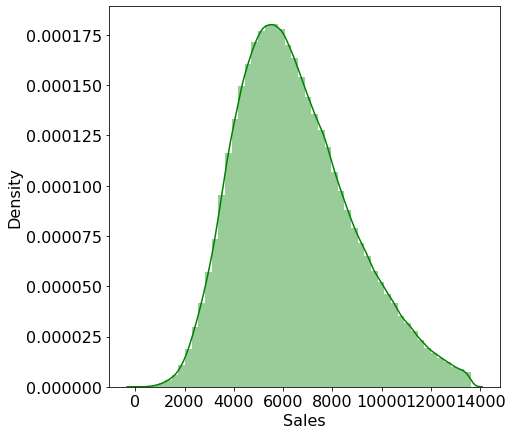

In [335]:
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="g");

In [336]:
df.shape

(713769, 20)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713769 entries, 0 to 1017207
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      713769 non-null  int64  
 1   DayOfWeek                  713769 non-null  int64  
 2   Sales                      713769 non-null  int64  
 3   Customers                  713769 non-null  int64  
 4   Open                       713769 non-null  int64  
 5   Promo                      713769 non-null  int64  
 6   StateHoliday               713769 non-null  object 
 7   SchoolHoliday              713769 non-null  int64  
 8   StoreType                  713769 non-null  object 
 9   Assortment                 713769 non-null  object 
 10  CompetitionDistance        713769 non-null  float64
 11  CompetitionOpenSinceMonth  713769 non-null  int64  
 12  CompetitionOpenSinceYear   713769 non-null  int64  
 13  Promo2                     7

In [338]:
numerical_columns=df.describe().columns

numerical_columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'year_of_sales', 'month_of_sales', 'day_of_sales'],
      dtype='object')

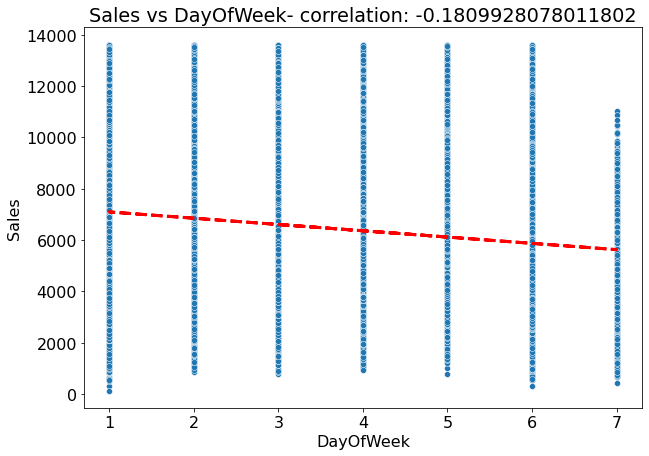

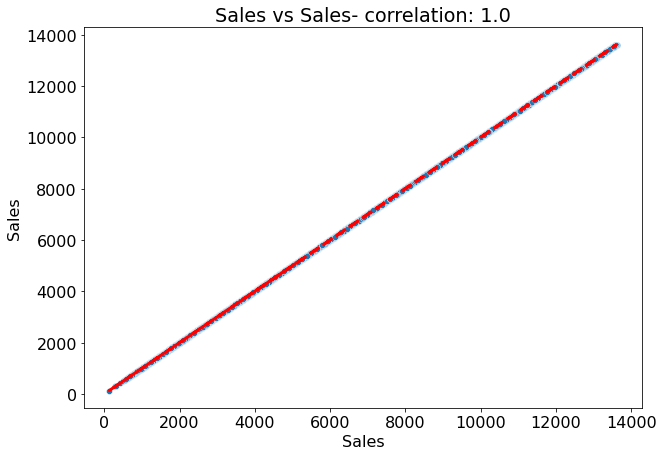

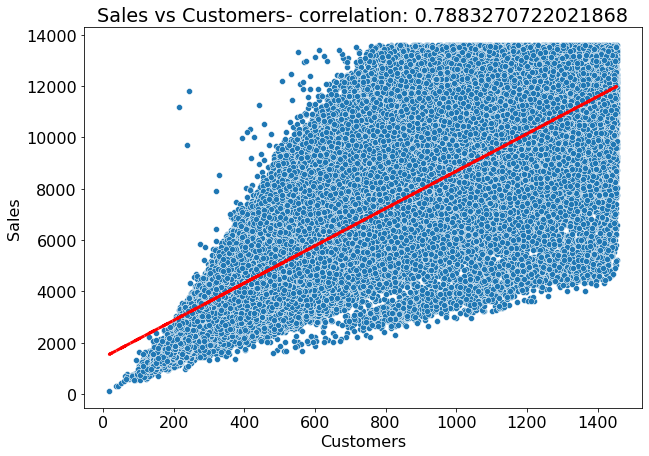

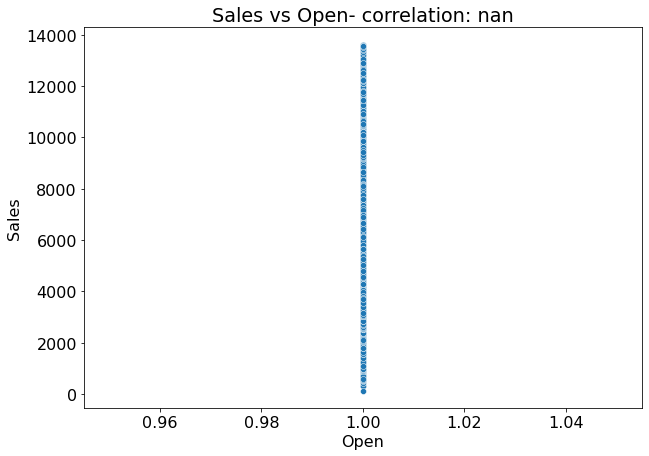

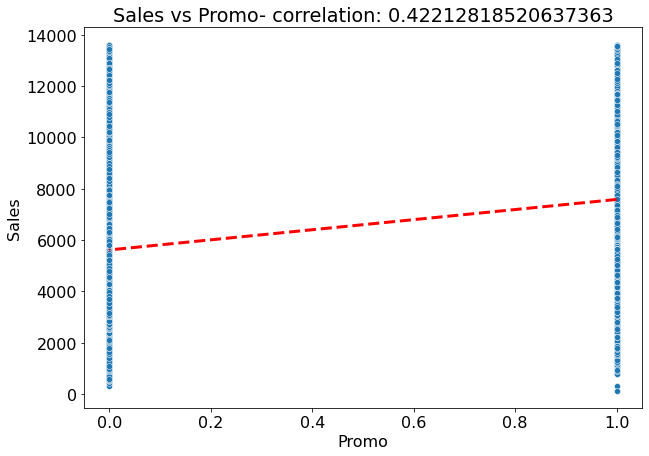

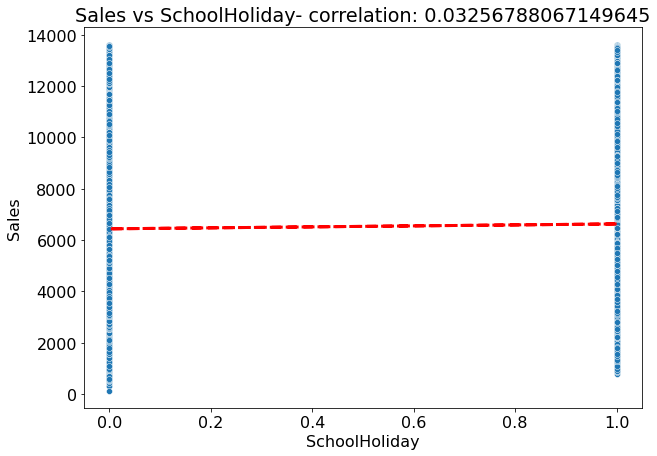

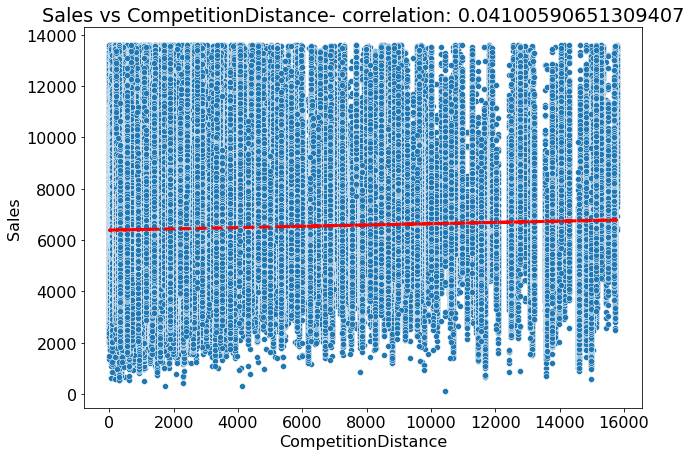

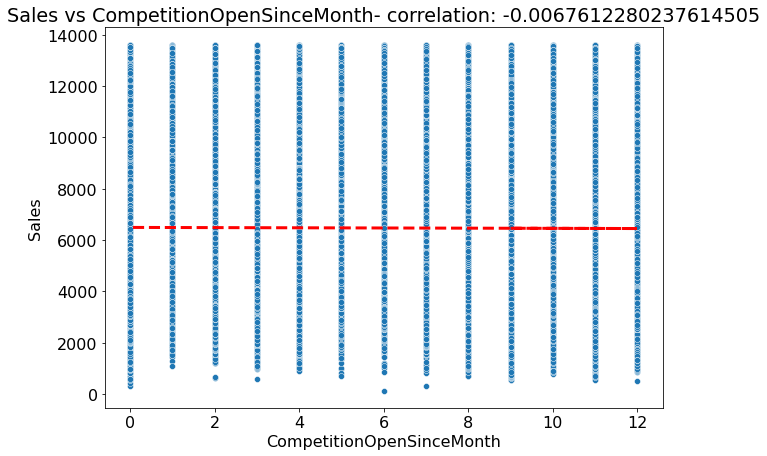

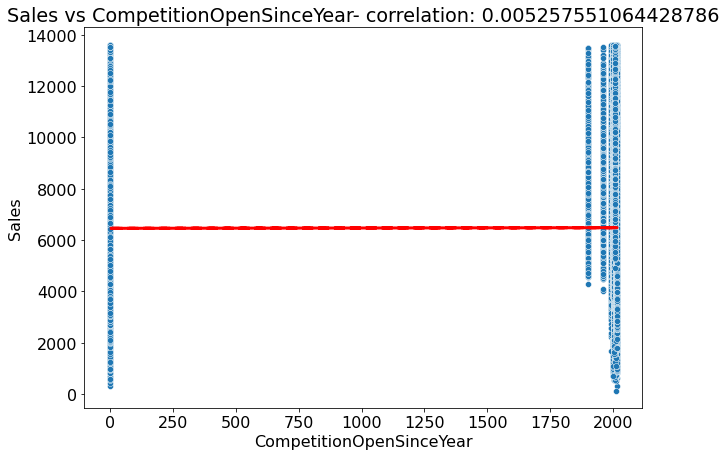

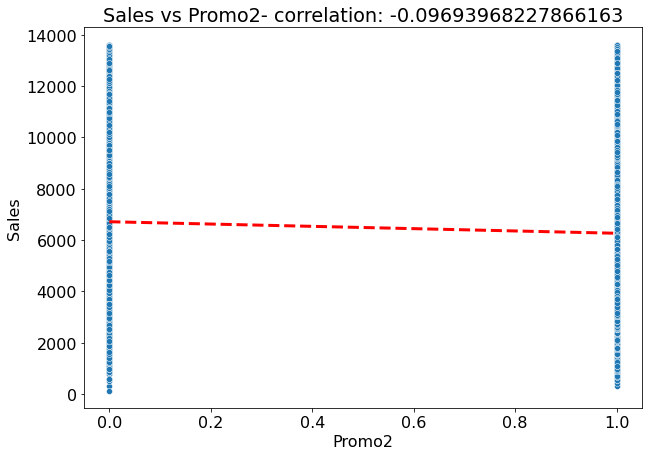

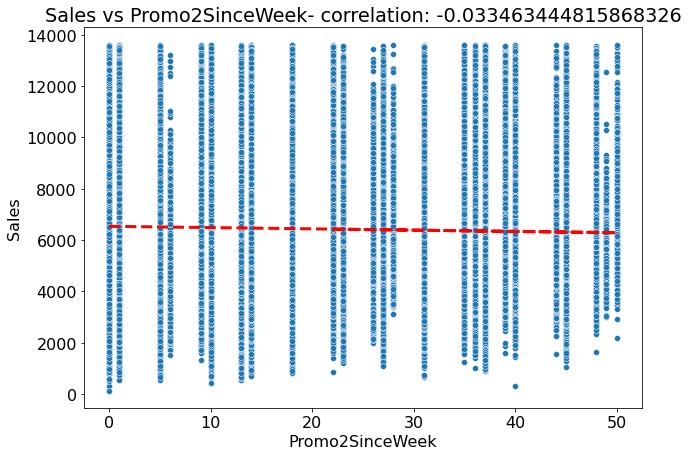

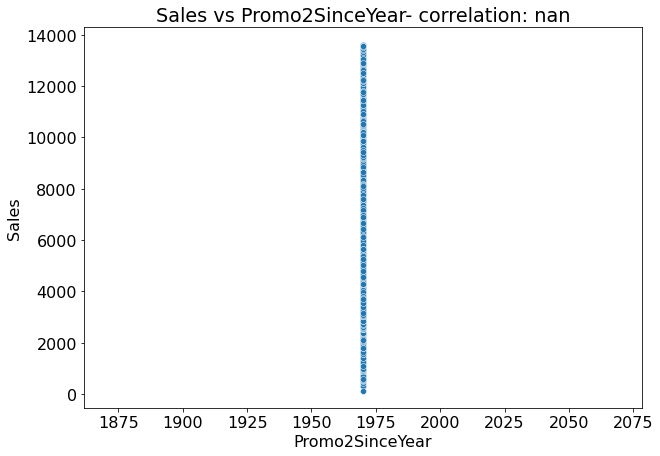

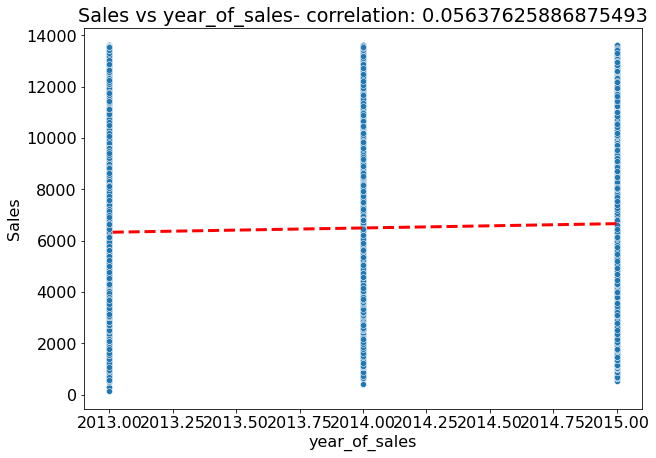

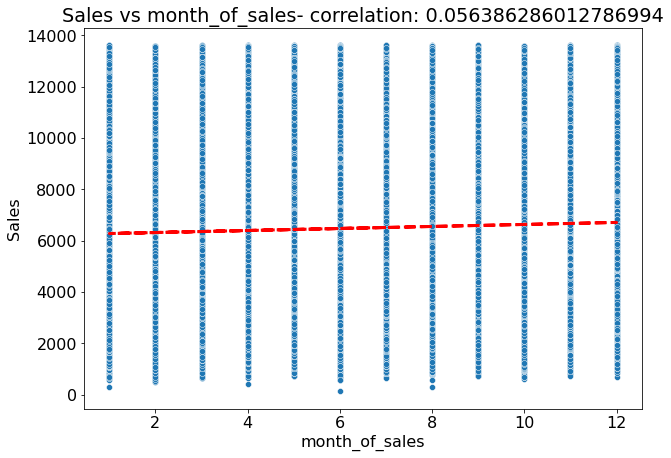

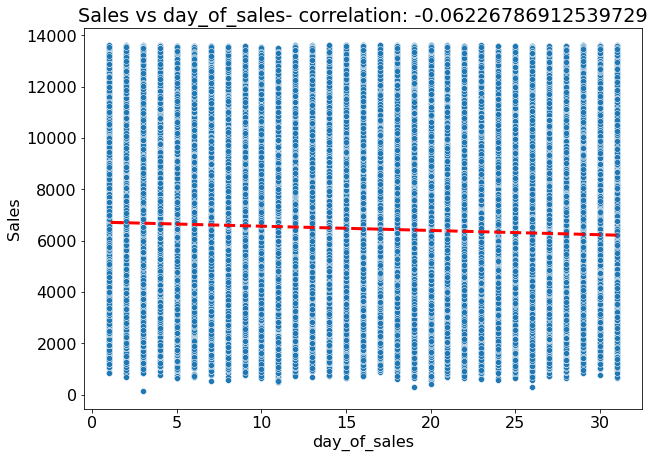

In [339]:
'''numerical_columns = ['DayOfWeek','Customers','CompetitionDistance',
                     'CompetitionOpenSinceMonth','CompetitionOpenSinceYear'
                     ,'Promo2SinceWeek','Promo2SinceYear']'''


for i in numerical_columns[1:]:
   plt.figure(figsize = (10,7))
   plt.rcParams['font.size'] = '16'
   feature = df[i]
   label = df['Sales']
   
   correlation = feature.corr(label)
   sns.scatterplot(x=i,y = df['Sales'],data = df)
   plt.title('Sales vs ' + i + '- correlation: ' + str(correlation))
   z = np.polyfit(df[i], df['Sales'], 1)
   slope = np.poly1d(z)(df[i])

   plt.plot(df[i], slope, "r--", lw=3)


## ***CORRELATION ***

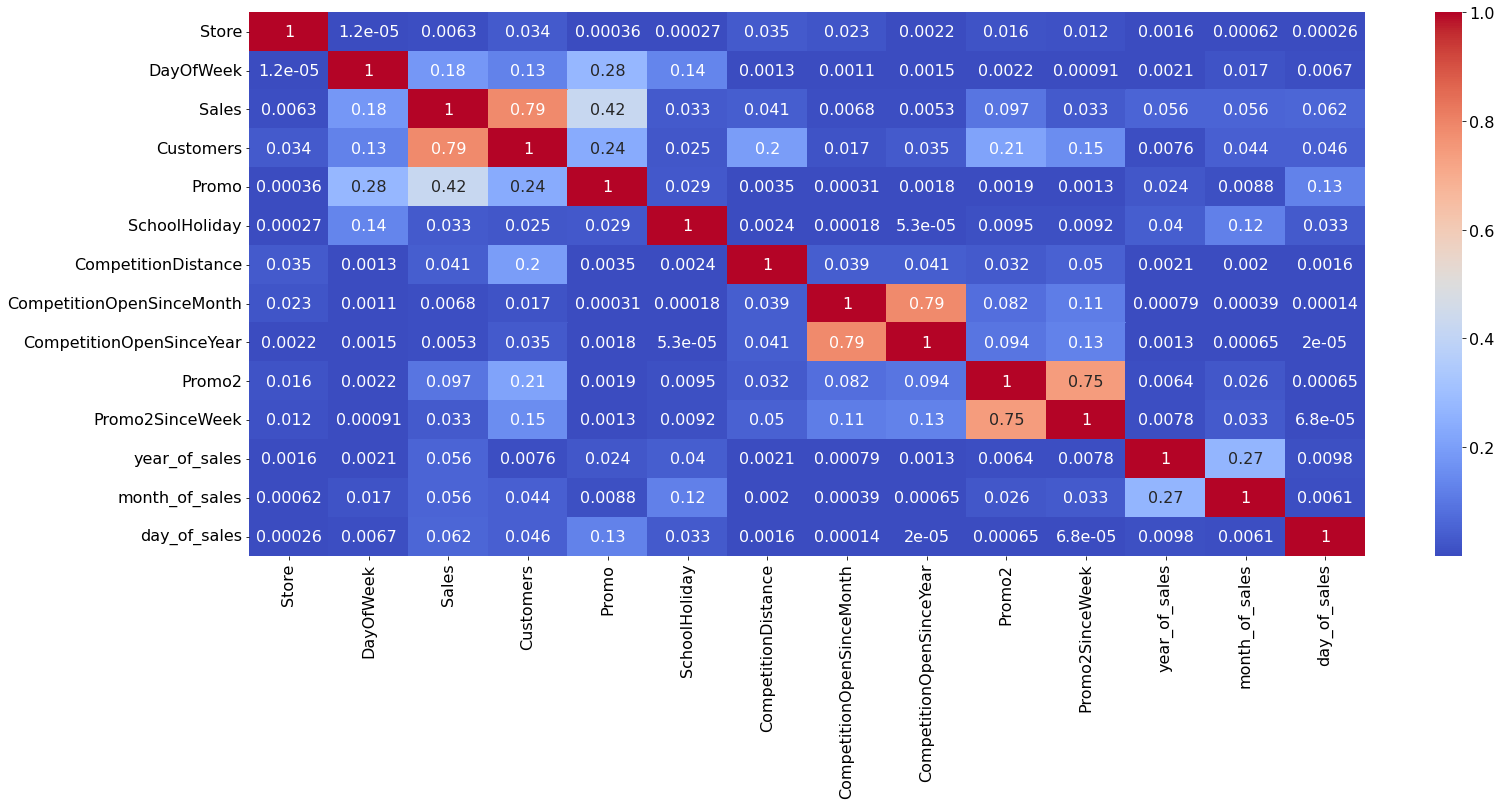

In [340]:

plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = '16'

correlation = df.drop(['Open','Promo2SinceYear'],axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [341]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [342]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.004141
1,DayOfWeek,1.109107
2,Customers,1.178647
3,Open,0.000000
4,Promo,1.158751
5,SchoolHoliday,1.036152
6,CompetitionDistance,1.054894
7,CompetitionOpenSinceMonth,2.635701
8,CompetitionOpenSinceYear,2.642853
9,Promo2,2.306729


In [343]:

### Data encoding #'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'

#label encoding
encoders_nums = {"StateHoliday":{"0":0,"a":1,"b":2,"c":3},
                 "StoreType":{"a":1,"b":2,"c":3,"d":4},
                 "Assortment":     {"a": 1, "b": 2,"c":3},
                 "PromoInterval":{"0":0,"Jan,Apr,Jul,Oct":1,"Feb,May,Aug,Nov":2,"Mar,Jun,Sept,Dec":3},
                  
                 }

df= df.replace(encoders_nums)


In [344]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year_of_sales,month_of_sales,day_of_sales
0,1,5,5263,555,1,1,0,1,3,1,1270.0,9,2008,0,0,1970,0,2015,7,31
1,1,4,5020,546,1,1,0,1,3,1,1270.0,9,2008,0,0,1970,0,2015,7,30
2,1,3,4782,523,1,1,0,1,3,1,1270.0,9,2008,0,0,1970,0,2015,7,29
3,1,2,5011,560,1,1,0,1,3,1,1270.0,9,2008,0,0,1970,0,2015,7,28
4,1,1,6102,612,1,1,0,1,3,1,1270.0,9,2008,0,0,1970,0,2015,7,27


In [345]:
df.shape

(713769, 20)

In [346]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [347]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.005298
1,DayOfWeek,1.109396
2,Customers,1.214007
3,Open,0.000000
4,Promo,1.160918
5,StateHoliday,1.000403
6,SchoolHoliday,1.036365
7,StoreType,1.159253
8,Assortment,1.127954
9,CompetitionDistance,1.131100


# **MODEL TRAINNING**

In [364]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [349]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year_of_sales', 'month_of_sales',
       'day_of_sales'],
      dtype='object')

In [350]:
X = df.drop('Sales',axis = 1)
y = df['Sales']

In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print(X_train.shape)
print(X_test.shape)

(571015, 19)
(142754, 19)


In [352]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [353]:
##Checking accuracy on train data

accuracy = model.score(X_train,y_train)
print(accuracy*100,'%')

76.26119644710532 %


In [354]:
#Checking accuracy on test data
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

76.44675143989174 %


In [355]:
y_pred = model.predict(X_test)

metrics.r2_score(y_pred,y_test)

0.6890453711259192

In [356]:
model.intercept_

-342215.4713267698

In [357]:
model.coef_

array([-1.22588822e-01, -1.71136376e+01,  7.45802326e+00, -2.37587727e-13,
        1.04226037e+03, -7.99835992e+02,  1.68851480e+01,  2.72834871e+02,
        1.67958841e+02,  9.12453644e-02,  1.70492614e+00,  3.46512793e-02,
        2.30840801e+02,  1.48099967e+01,  3.83693077e-13, -1.66172580e+02,
        1.69580654e+02,  2.89907447e+01,  9.11158760e-01])

In [358]:
# Lasso
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.02 , max_iter= 1000)

lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.7626118982142537

In [359]:
lasso.score(X_test, y_test)


0.7644668087419486

In [360]:
# Ridge
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.02 , max_iter= 1000)
ridge.fit(X_train, y_train)



Ridge(alpha=0.02, max_iter=1000)

In [361]:
ridge.predict(X_test)


array([6116.41470454, 5258.76680257, 4675.51858592, ..., 6515.35390987,
       9475.32980162, 5189.81467157])

In [362]:
ridge.score(X_test, y_test)


0.7644675135865086

In [373]:
sales_mean=df['Sales'].mean()
sales_mean


6469.0413397051425

In [375]:
from sklearn.metrics import  mean_squared_error 
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 1354659.0629735398
RMSE : 1163.8982184768304
RMPSE : 0.17991819148428578
R2 : 0.7469438922309563
